In [5]:
import numpy as np

np.random.seed(0)   # シードを固定する
rewards = []

for n in range(1, 11):  # 1から10まで
    reward = np.random.rand()   # dummy rewards. 実数の乱数(0.0-1.0)
    rewards.append(reward)
    # 推定行動価値の計算
    Q = sum(rewards) / len(rewards)
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [4]:
import numpy as np
np.random.seed(0)

Q = 0 # 推定行動価値の初期値

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [ ]:
import numpy as np

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)   # 0.0-1.0の実数.扱いは1のでやすさ。
        print(self.rates)
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        return 0

bandit = Bandit()
Q = 0

# 0番目のマシンを10回playするときの行動価値
for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward-Q)/n
    print(Q)

In [ ]:
# ランダムの行動でマシンを使って報酬を計算する。

Qs = np.zeros(10)
Ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit(action)
    # 推定行動価値を更新する
    Ns[action] += 1
    Qs[action] += (reward-Qs[action]) / Ns[action]

In [11]:
import numpy as np

class Agent:
    def __init__(self, epsilon=0.1, arms=10):
        self.Qs = np.zeros(arms)
        self.Ns = np.zeros(arms)
        self.epsilon=epsilon
        self.arms = arms

    # 行動価値を更新する
    def update(self, action, reward):
        self.Ns[action] += 1
        self.Qs[action] += (reward-self.Qs[action]) / self.Ns[action]   # 行動価値は標本平均を使う

    # 行動関数
    def get_action(self):
        # 探索モードか否か
        if self.epsilon > np.random.randn():
            # 探索（ランダムでマシンを選択）
            return np.random.randint(0, self.arms)
        else:
            # 活用（これまでの行動価値が最も高いマシンを選択）
            return np.argmax(self.Qs)


[0.7977837  0.14082836 0.18107904 0.5375421  0.87773753 0.28061199
 0.78709267 0.41570373 0.39777353 0.10063789]
636


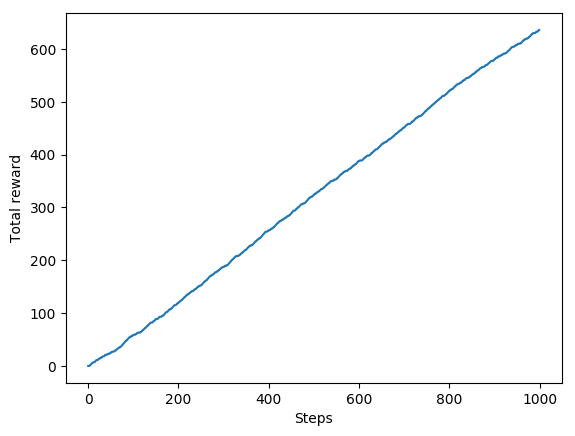

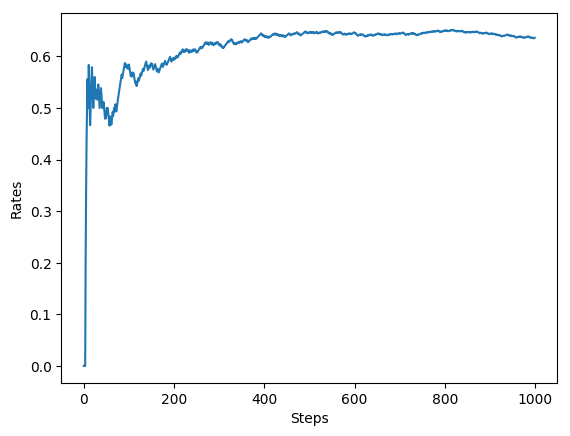

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit(arms=10)
agent = Agent(arms=10)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()     # 行動を選択(探索or活用)
    reward = bandit.play(action)    # 選択した行動で報酬を得る
    agent.update(action, reward)    # 行動と報酬から学ぶ

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))
print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

[0.26916131 0.51103035 0.97690094 0.02579562 0.28915134 0.88256431
 0.87652511 0.68924152 0.58184513 0.41962254]
[0.67405622 0.10151386 0.53182076 0.98407666 0.84544959 0.41301279
 0.51924421 0.25728798 0.57739421 0.48189994]
[0.69151963 0.71822368 0.90880652 0.07694735 0.20424461 0.60313555
 0.91308388 0.00203156 0.65750611 0.34369551]
[0.2906279  0.51800501 0.72454641 0.63282467 0.15024808 0.59504917
 0.21851929 0.26255649 0.15924874 0.12550032]
[0.67222846 0.55421849 0.86388231 0.61779564 0.20829051 0.15781338
 0.3011165  0.92847115 0.01756601 0.7065844 ]
[0.16265643 0.60970264 0.91221455 0.22762838 0.89492206 0.29201679
 0.08886466 0.1613234  0.20285515 0.83970094]
[0.53020112 0.4650407  0.07461837 0.21282542 0.12507916 0.33939805
 0.42434576 0.26104274 0.02437812 0.36576696]
[0.18233073 0.81378706 0.30118246 0.69696084 0.36510877 0.11995699
 0.03441183 0.87859616 0.93185422 0.10024084]
[0.08264135 0.17554004 0.06106356 0.69536031 0.79418813 0.01755875
 0.72249299 0.10063234 0.9936

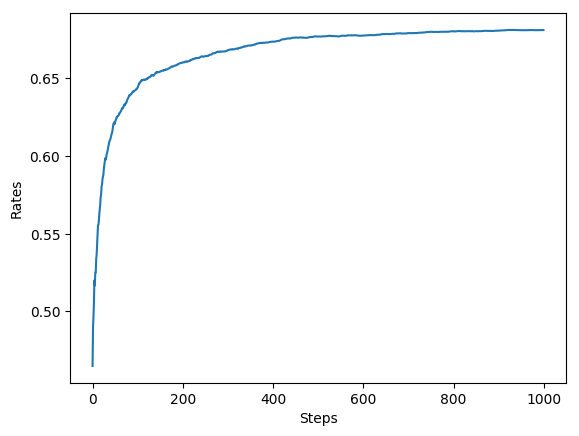

In [20]:
# 上記の試行を200回行って平均を取り、アルゴリズムの精度を評価する

%matplotlib inline
import matplotlib.pyplot as plt

runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit(arms=10)
    agent = Agent(arms=10)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()     # 行動を選択(探索or活用)
        reward = bandit.play(action)    # 選択した行動で報酬を得る
        agent.update(action, reward)    # 行動と報酬から学ぶ

        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step+1))
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()